## Péndulo Simple
El presente documento da al usuario valores de posición y velocidad angular para la simulación de un pédulo simple.   
Lo primero será la importación de librerías.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
#Valores invariantes para la caracterización del péndulo
longitud = 1. #[m]
g = 9.81 #[m/s^2]

In [73]:
#condiciones iniciales
t= 1 #[s]
velocidad=0. #[m/s]
angulo=55 #[radianes]
u=np.array([angulo,velocidad])

Ahora, se deben de crear los arreglos donde se guardarán todo el registro de datos para el péndulo iniciando los primeros términos con los valores iniciales.

In [74]:
tiempo = [t]
pangular = [u[0]]
vangular = [u[1]]

La aceleración depende de la longitud del péndulo y del ángulo en cada instante según la ecuación con aproximación para ángulos pequeños:      
$$\alpha = - \frac{g \sin(\theta)}{l} \approx - \frac{g \theta}{l} $$
Por lo anterior se crea un función que calcule la aceleración para cada variable mencionada anteriormente.

In [75]:
def f(u,t):
    return -g*np.sin(u[0])/1

Se crea otra función que recibe el ángulo y velocidad angular en cada instante de tiempo t para devolver el ángulo que se le ingresó junto con la aceleración del respectivo ángulo.

In [76]:
def F(u,t):
    return np.array([u[1],f(u,t)])

También se declaran los valores límites del tiempo para los que se piensa correr el código donde el tiempo final se calculó previmente para que coincidiera con el periodo de un péndulo de longitud de un metro y el incremento del tiempo correspondiente a la razón de 1/30 fotogramas por segundo para comparaciones con pruebas experimentales.

In [77]:
dt = 0.033
tf = 2.

Finalmente se escribe el ciclo que:
- Pondrá en funcionamiento las funciones creadas.
- Tendrá el actualizador de tiempo para ajustar el final del ciclo cuando t llegue al tiempo final.
- Guardará todos los resultados obtenidos en cada paso del tiempo en los arreglos creados anteriormente para el registro de datos.

In [78]:
while t<tf:
    u=u+F(u,t)*dt
    t=t+dt
    pangular.append(u[0]*np.pi/180.)
    vangular.append(u[1])
    tiempo.append(t)

Finalmente para una mejor apreciación se ilustró la posición angular contra el tiempo para un periodo en los casos teóricos y experimentales de un metro con ángulo inicial de $6^o$ y de dos metros con ángulo inicial de $55^o$

In [79]:
excel = 'posicion_angular_experimental.xlsx'
datos = pd.read_excel(excel)

In [97]:
excel1 = 'XDD3.xlsx'
datos1 = pd.read_excel(excel1)

In [92]:
t_55 = datos["TIEMPO"]
angulo_55 = datos["ANGULO"]

In [100]:
t_6 = datos1["tiempo2"]
angulo_6 = datos1["angulo2"]

Text(0.5, 0, 'Tiempo [s] ')

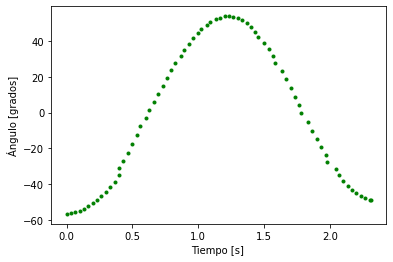

In [106]:
plt.figure(1)
plt.plot(t_55,angulo_55,"g.")
plt.ylabel("Ángulo [grados]")
plt.xlabel("Tiempo [s] ")

Text(0.5, 0, 'Tiempo [s] ')

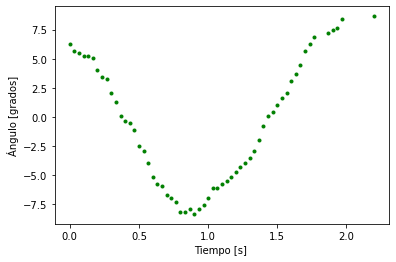

In [107]:
plt.figure(1)
plt.plot(t_6,angulo_6,"g.")
plt.ylabel("Ángulo [grados]")
plt.xlabel("Tiempo [s] ")